<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product ">
</a> 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/image/IDSN-logo.png" width="200" alt="cognitiveclass.ai logo">


<h2>Objective</h2><ul><li> How to download and pre-process the Concrete dataset.</li></ul> <p>Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative. In this lab you are going to have to download the data and study the dataset. There are two questions in this lab, including listing the path to some of the image files as well as plotting a few images. Remember the results as you will be quizzed on them. </p>


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">


<ul>
    <li><a href="#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="#download_data"> Download data</a></li>
    <li><a href="#examine_files">Examine Files</a></li>
    <li><a href="#Question_1">Question 1 </a></li>
    <li><a href="#Display">Display and Analyze Image With No Cracks    </a></li>
    <li><a href="#Question_2">Question 2 </a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>
 </div>
<hr>


<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab:


In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import skillsnetwork

We will use this function in the lab to plot:


In [2]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

<h2 id="download_data">Download Data</h2>


In this section, you are going to download the data from IBM object storage using **skillsnetwork.prepare** command. <b>skillsnetwork.prepare</b> is a command that's used to download a zip file, unzip it and store it in a specified directory. Locally we store the data in the directory  **/resources/data**. 


In [3]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/resources/data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '../../data'


We then download the files that contain the negative images:


<h2 id="examine_files">Examine Files </h2>


In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files. 


The path to all the images are stored in the variable  <code>directory</code>. 


In [4]:
directory="/resources/data"

The images with out the cracks are stored in the file <b>Negative</b>


In [5]:
negative='Negative'

We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. Inputs are the variable directory as well as the variable  <code>negative</code>.


In [6]:
negative_file_path=os.path.join(directory,negative)
negative_file_path

'/resources/data/Negative'

<h3> Loading the File Path of Each Image </h3>


We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.


In [7]:
 os.listdir(negative_file_path)[0:3]

['05365.jpg', '18695.jpg', '16368.jpg']

We need the full path of the image so we join them as above. Here are a few samples  three samples:


In [8]:
[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path)][0:3]

['/resources/data/Negative/05365.jpg',
 '/resources/data/Negative/18695.jpg',
 '/resources/data/Negative/16368.jpg']

In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>. The method  <code>endswith()</code> returns True if the string ends with the specified suffix, otherwise, it will return False. Let's do a quick example: 


In [9]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact. We assign it to the variable <code>negative_files<code> , sort it in and display the first three elements:


In [10]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/resources/data/Negative/00001.jpg',
 '/resources/data/Negative/00002.jpg',
 '/resources/data/Negative/00003.jpg']



<h2 id="Question_1">Question 1</h2>


<b>Using the procedure above, load all the images with cracks paths into a list called positive files, the directory of these images is called Positive.  Make sure the list is sorted and display the first three elements of the list you will need this for the question so remember it.</b>


In [15]:
positive="Positive"
positive_file_path=os.path.join(directory,positive)
positive_file_path


'/resources/data/Positive'

In [21]:
os.listdir(positive_file_path)[0:3]

['05365.jpg', '15567_1.jpg', '13021_1.jpg']

In [22]:
positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['/resources/data/Positive/00001.jpg',
 '/resources/data/Positive/00002.jpg',
 '/resources/data/Positive/00003.jpg']

<h2 id="Display">Display and Analyze Image With No Cracks</h2>


We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open. We only require the image path; the input is the path of the image. For example we can load the first image as follows:


In [16]:

image1 = Image.open(negative_files[0])
# you can view the image directly 
#image 

we can plot the image


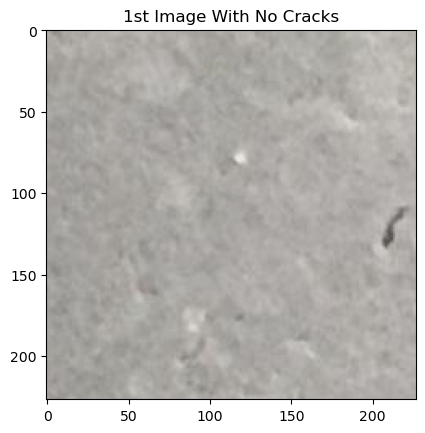

In [17]:
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

We can also plot the second image.


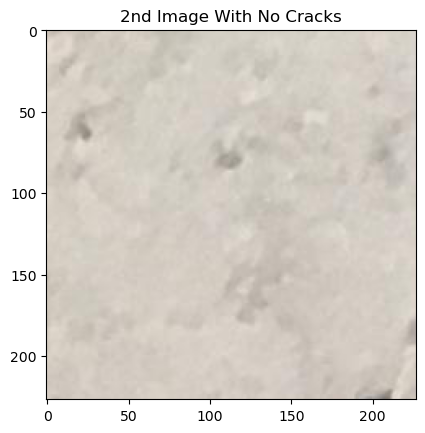

In [18]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Cracks")
plt.show()

<h2 id="Question_2">Question 2</h2>


<b>Plot the first three images for the dataset with cracks. Don't forget. You will be asked in the quiz, so remember the image. </b>



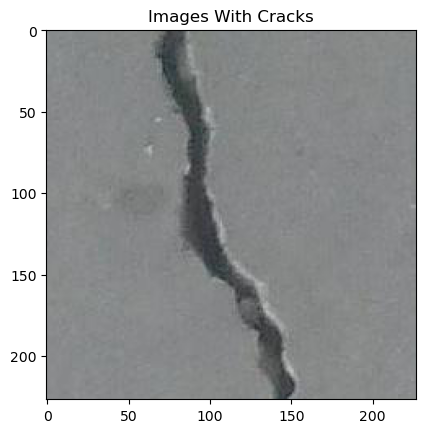

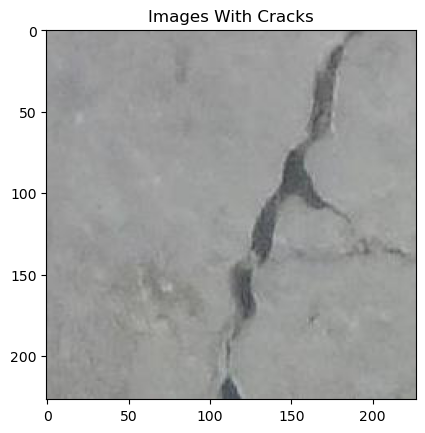

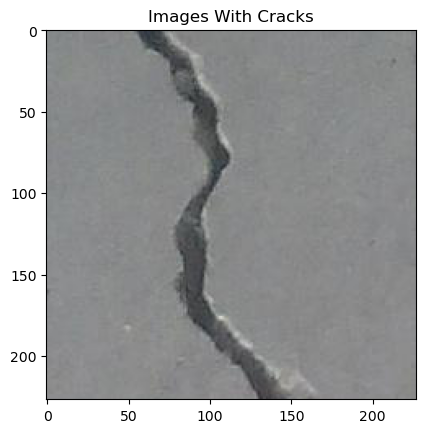

In [23]:
for i in range(0,3):
  image = Image.open(positive_files[i])
  plt.imshow(image)
  plt.title("Images With Cracks")
  plt.show()

<hr>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


 [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork951-2022-01-01). Ph.D., is a data scientist in the Digital Business Group at IBM Canada. Alex has been intensively involved in many exciting data science projects such as designing a smart system that could detect the onset of dementia in older adults using longitudinal trajectories of walking speed and home activity. Before joining IBM, Alex worked as a data scientist at Datascope Analytics, a data science consulting firm in Chicago, IL, where he designed solutions and products using a human-centred, data-driven approach. Alex received his Ph.D. in Biomedical Engineering from the University of Toronto.



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-18  | 2.0  | Shubham  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
